In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df_train_total = pd.read_csv('train.csv')
# data preprocessing
df_train_total = df_train_total.drop('ID', axis=1)
string_columns = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
df_train_total[string_columns] = df_train_total[string_columns].applymap(lambda x: int(''.join(str(ord(c)) for c in x)))
df_train_total.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,107,118,97116,97,100,117,106,111,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,107,116,97118,101,100,121,108,111,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,97122,119,110,99,100,120,106,120,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,97122,116,110,102,100,120,108,101,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,97122,118,110,102,100,104,100,110,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
scaler = MinMaxScaler()
df_train_total[string_columns] = scaler.fit_transform(df_train_total[string_columns])
df_train_total.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,0.000103,0.002165,0.999948,0.000000,1.0,0.000186,0.818182,0.583333,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,0.000103,0.001959,0.999969,0.666667,1.0,0.000227,1.000000,0.583333,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,1.000000,0.002268,0.000134,0.333333,1.0,0.000216,0.818182,0.958333,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,1.000000,0.001959,0.000134,0.833333,1.0,0.000216,1.000000,0.166667,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,1.000000,0.002165,0.000134,0.833333,1.0,0.000052,0.272727,0.541667,0,...,0,0,0,0,0,0,0,0,0,0


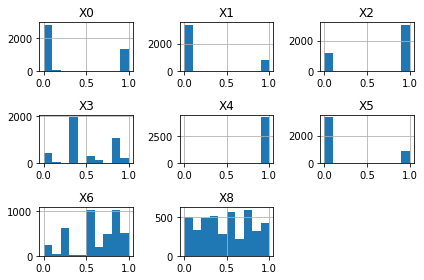

In [5]:
df_train_total[string_columns].hist()
plt.tight_layout()

In [6]:
sorted_corr = df_train_total.corr().sort_values('y', ascending=False).head(46)
sorted_corr_features = sorted_corr.index
sorted_corr_features = list(sorted_corr_features)[1:]
sorted_corr.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
y,1.000000,0.141221,-0.018763,0.051616,-0.150741,-0.015272,0.027312,0.004252,0.003328,-0.026985,...,0.029100,0.114005,0.061403,-0.258679,0.067919,0.040932,-0.159815,0.040291,-0.004591,-0.022280
X314,0.606005,0.370958,0.002579,0.050705,-0.101764,-0.013728,0.002590,0.040310,0.003698,-0.038410,...,0.018184,0.101084,0.020662,-0.126620,0.082724,0.033879,-0.076285,-0.023801,-0.019003,-0.032930
X261,0.588785,0.385257,-0.005732,0.069025,-0.093864,-0.014489,0.005680,0.036361,0.019528,-0.035701,...,0.031950,0.008044,0.037381,-0.123521,0.085434,0.036220,-0.074418,-0.022887,-0.018538,-0.032124
X263,0.379629,-0.292938,0.105221,0.249186,-0.188854,-0.006134,0.002299,-0.013201,-0.004552,0.024615,...,0.145030,0.052242,0.143683,-0.685348,0.020764,0.019130,-0.412903,0.008652,0.004622,0.008009
X136,0.368177,-0.290285,0.105828,0.246437,-0.190653,-0.006170,0.003569,-0.011289,-0.004657,0.024757,...,0.145865,0.052543,0.144510,-0.681423,0.020883,0.019240,-0.410539,0.008702,0.004649,0.008055


In [7]:
y_total = df_train_total['y']
x_total = df_train_total.drop('y', axis=1)
x_total = x_total[sorted_corr_features]
x_train, x_val, y_train, y_val = train_test_split(x_total, y_total, test_size=0.2, random_state=99)

In [8]:
# Linear Regression
linear_regressor = LinearRegression()
print('Training Accuracy: ', linear_regressor.fit(x_train, y_train).score(x_train, y_train))
print('Validation Accuracy: ', linear_regressor.score(x_val, y_val))

Training Accuracy:  0.548456473301115
Validation Accuracy:  0.5892730958851629


In [9]:
# Polynomial Regression
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.fit_transform(x_val)
print('Training Accuracy: ', linear_regressor.fit(x_train_poly, y_train).score(x_train_poly, y_train))
print('Validation Accuracy: ', linear_regressor.score(x_val_poly, y_val))

Training Accuracy:  0.6734386967604191
Validation Accuracy:  -6.658614695006711e+20


In [10]:
#Ridge Regression
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.fit_transform(x_val)
ridge_regressor = Ridge(alpha = 144)
print('Training Accuracy: ', ridge_regressor.fit(x_train_poly, y_train).score(x_train_poly, y_train))
print('Validation Accuracy: ', ridge_regressor.score(x_val_poly, y_val))
y_pred = ridge_regressor.predict(x_val_poly)
print('R2 Score: ', metrics.r2_score(y_val, y_pred))

Training Accuracy:  0.5638667915907742
Validation Accuracy:  0.5989648048294779
R2 Score:  0.5989648048294779


In [11]:
#Grid Search for regularization rate
# param_grid = {'alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 25, 50, 100, 150, 250]} #initial grid search
param_grid = {'alpha' : [140, 142, 144, 146, 148, 150]} #second grid search to fine tune
nfold = 10
grid_search = GridSearchCV(ridge_regressor, param_grid=param_grid)
grid_search.fit(x_train_poly, y_train)
grid_search.best_params_

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'alpha': 144}

In [12]:
test_input = pd.read_csv('test.csv')
output_df = pd.DataFrame()
output_df['ID'] = test_input['ID']

test_input = test_input.drop('ID', axis=1)
test_input[string_columns] = test_input[string_columns].applymap(lambda x: int(''.join(str(ord(c)) for c in x)))
test_input[string_columns] = scaler.fit_transform(test_input[string_columns])
test_input = test_input[sorted_corr_features]
test_input.head()
test_input_poly = poly.fit_transform(test_input)
y_test = ridge_regressor.predict(test_input_poly)
output_df['y'] = y_test
output_df.to_csv('output.csv', index=False)

In [24]:
#XGBoost
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.1)
xgb_regressor.fit(x_train, y_train)
y_pred = xgb_regressor.predict(x_val)
print('R2 Score: ', metrics.r2_score(y_val, y_pred))

[10:59:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score:  0.596276913662894


In [23]:
#Grid Search for XGBoost parameters
param_grid = {
#     'max_depth' : [5,7,9,11],
#     'n_estimators' : [50, 100, 150, 200],
    'learning_rate' : [0.08, 0.1, 0.12]
}
nfold = 10
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=10)
grid_search.fit(x_train, y_train)
grid_search.best_params_

[10:58:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:58:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'learning_rate': 0.1}

In [26]:
test_input = pd.read_csv('test.csv')
output_df = pd.DataFrame()
output_df['ID'] = test_input['ID']

test_input = test_input.drop('ID', axis=1)
test_input[string_columns] = test_input[string_columns].applymap(lambda x: int(''.join(str(ord(c)) for c in x)))
test_input[string_columns] = scaler.fit_transform(test_input[string_columns])
test_input = test_input[sorted_corr_features]
y_test = xgb_regressor.predict(test_input)
output_df['y'] = y_test
output_df.to_csv('output.csv', index=False)